In [1]:
"""
Basic Self Organizing Map Building blocks test

Author: Prof. Fabrício Galende Marques de Carvalho

"""

from som_model import *
from matplotlib import pyplot as plt
import numpy as np
from random import shuffle



# First we test the neuron building block
my_som_neuron = SOMNeuron(10)
print("SOM Neuron weights: ",  my_som_neuron.weights)
print("SOM Neuron weights norm:",  np.linalg.norm(my_som_neuron.weights))
print("SOM Neuron post-activation: ", my_som_neuron.post_activation)

SOM Neuron weights:  [[ 0.43722864]
 [ 0.20341486]
 [-0.25181639]
 [-0.26434756]
 [ 0.6264497 ]
 [-0.35654516]
 [-0.02010906]
 [ 0.1346046 ]
 [-0.30163077]
 [ 0.07137789]]
SOM Neuron weights norm: 1.0
SOM Neuron post-activation:  [[0.]]


In [2]:
# Now we build a SOM Network of dimensions 4x4
rand_seed = 10
np.random.seed(rand_seed) #freeze random number generation initial state
my_som_net = SOMNetwork([4, 4], 3) 
print("Object matrix that stores network neurons: ", my_som_net.neurons) 
print("SOM network dimensions: ", my_som_net.grid_dimensions) 
print("Let's see a single neuron weights: ", my_som_net.neurons[0,0].weights)

Object matrix that stores network neurons:  [[<som_model.SOMNeuron object at 0x758ad0033c10>
SOM network dimensions:  [4, 4]
Let's see a single neuron weights:  [[ 0.61598635]
 [ 0.33088506]
 [-0.71489572]]


(271, 309, 4)
[ 79 107  92 255]


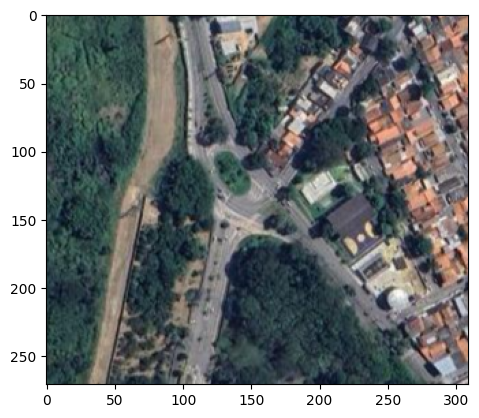

In [3]:
# Now we train our Self Organizing MAP to make a semantic representation
# map based upon a RGB simple image

# First we read image
file_name = "inpe.bmp"
img = plt.imread(file_name)

# Lets check image shape:
print(img.shape) 
# Lets check a single pixel value:
print(img[10,10][:4])
plt.figure()
plt.imshow(img)


image shape:  (4, 4, 3)
image shape:  (4, 4, 3)


Text(0.5, 1.0, 'Initial neural network grid representation')

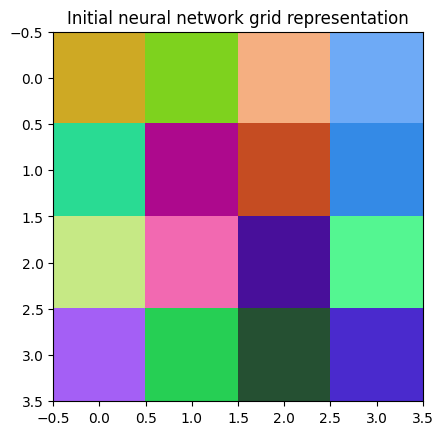

In [4]:
# now we build a image representation for SOM NNet:

nnet_img_repr = np.zeros((my_som_net.grid_dimensions[0], my_som_net.grid_dimensions[1], 3), dtype=np.uint8)
print("image shape: ", nnet_img_repr.shape)
#lets convert weight representation to RGB values:
# We must identify the

RGBMAX = 255
for i in range(my_som_net.grid_dimensions[0]):
    for j in range(my_som_net.grid_dimensions[1]):
        weight = my_som_net.neurons[i, j].weights.flatten()
        nnet_img_repr[i,j][:] = ((RGBMAX / 2) * (weight + 1)).astype(int)
print("image shape: ", nnet_img_repr.shape)
plt.figure()
plt.imshow(nnet_img_repr)
plt.title("Initial neural network grid representation")

In [5]:
# Now we train our SOM network:
# Let's define the neightbor function:
def neighbor_fcn(wnx, wny, x, y, sigma):
    return np.exp(- ((wnx-x)**2 + (wny-y)**2)/(2*sigma**2) )

# Let's test the neighbor function:
print("winning neuron factor: ", neighbor_fcn(1,1,1,1,1))
print("nearby neuron factor: ", neighbor_fcn(1,1,0,1,1))
print("far away neuron factor: ", neighbor_fcn(1,1,9,9,1))



winning neuron factor:  1.0
nearby neuron factor:  0.6065306597126334
far away neuron factor:  1.603810890548638e-28


In [6]:
# We train our network for each image pixel
X_in = []
for i in range(len(img)):
    for j in range(len(img[0])):
        xnorm = np.linalg.norm(img[i,j][:3])
        x_in = ((img[i,j][:3]/xnorm)-0.5)*2
        X_in.append(x_in)
        #print(x_in)
eta = 1
sigma = 1
n_epochs = 100
print("number of samples: ", len(X_in))
data_idx = list(range(len(X_in)))
for epoch in range(n_epochs):  
    shuffle(data_idx)
    print("epoch:", epoch)
    if ((epoch % 50) == 0) and epoch != 0 :
        sigma = sigma*0.8
        eta = eta*0.8
    for i in data_idx:
        x_in = X_in[i].reshape(-1,1)
        my_som_net.organize(x_in, eta, neighbor_fcn,sigma)
        if (i%50000) == 0:
            print(i, " of ", len(X_in))


number of samples:  83739
epoch: 0
0  of  83739
50000  of  83739
epoch: 1
50000  of  83739
0  of  83739
epoch: 2
0  of  83739
50000  of  83739
epoch: 3
0  of  83739
50000  of  83739
epoch: 4
0  of  83739
50000  of  83739
epoch: 5
50000  of  83739
0  of  83739
epoch: 6
0  of  83739
50000  of  83739
epoch: 7
0  of  83739
50000  of  83739
epoch: 8
50000  of  83739
0  of  83739
epoch: 9
0  of  83739
50000  of  83739
epoch: 10
50000  of  83739
0  of  83739
epoch: 11
50000  of  83739
0  of  83739
epoch: 12
0  of  83739
50000  of  83739
epoch: 13
50000  of  83739
0  of  83739
epoch: 14
0  of  83739
50000  of  83739
epoch: 15
50000  of  83739
0  of  83739
epoch: 16
0  of  83739
50000  of  83739
epoch: 17
50000  of  83739
0  of  83739
epoch: 18
0  of  83739
50000  of  83739
epoch: 19
0  of  83739
50000  of  83739
epoch: 20
50000  of  83739
0  of  83739
epoch: 21
0  of  83739
50000  of  83739
epoch: 22
50000  of  83739
0  of  83739
epoch: 23
0  of  83739
50000  of  83739
epoch: 24
0  of  83739
5

image shape:  (4, 4, 3)
image shape:  (4, 4, 3)


Text(0.5, 1.0, 'Trained neural network grid representation')

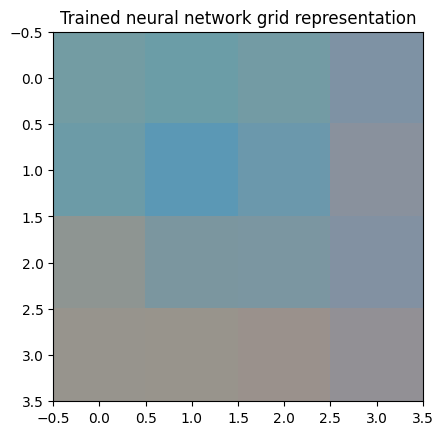

In [7]:
# Image representation after training

nnet_img_repr_trained = np.zeros((my_som_net.grid_dimensions[0], my_som_net.grid_dimensions[1], 3), dtype=np.uint8)
print("image shape: ", nnet_img_repr_trained.shape)
#lets convert weight representation to RGB values:
# We must identify the

RGBMAX = 255
for i in range(my_som_net.grid_dimensions[0]):
    for j in range(my_som_net.grid_dimensions[1]):
        #w_norm = np.linalg.norm(my_som_net.neurons[i, j].weights)
        #w_normalized = my_som_net.neurons[i, j].weights/w_norm
        #weight = w_normalized.flatten() #my_som_net.neurons[i, j].weights.flatten()
        weight = my_som_net.neurons[i, j].weights.flatten()
        nnet_img_repr_trained[i,j][:] = ((RGBMAX / 2) * (weight + 1)).astype(int)
print("image shape: ", nnet_img_repr.shape)
plt.figure()
plt.imshow(nnet_img_repr_trained)
plt.title("Trained neural network grid representation")

(271, 309, 3)


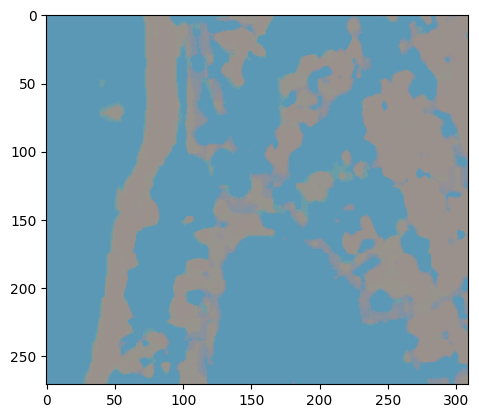

In [8]:
# Now we build a semantic map:
segmented_image = np.zeros( (len(img), len(img[0]) ,3 ), dtype=np.uint8)  
print(segmented_image.shape)
#print(segmented_image)
nn_grid = np.zeros( (len(my_som_net.neurons), len(my_som_net.neurons[0])))                            
for i in range(len(img)):
    for j in range(len(img[0])):
        xnorm = np.linalg.norm(img[i,j][:3])
        x_in = ((img[i,j][:3]/xnorm)-0.5)*2
        for k in range(my_som_net.grid_dimensions[0]):
            for l in range(my_som_net.grid_dimensions[1]):
                nn_grid[k,l]= np.dot(x_in.flatten(), my_som_net.neurons[k,l].weights.flatten())
        # Now we determine the winning neuron
        winning_neuron_max_flat_idx= np.argmax(nn_grid)
        wnx , wny =  np.unravel_index(winning_neuron_max_flat_idx, nn_grid.shape)
        weight = my_som_net.neurons[wnx, wny].weights.flatten()
        #print(weight)
        segmented_image[i,j][:] = ((RGBMAX / 2) * (weight + 1)).astype(int)
plt.figure()
plt.imshow(segmented_image)